In [1]:
from pylab import *
from scipy.integrate import quad
from scipy.optimize import brentq

%matplotlib inline


# Creating a inverse CDF for the Maxwell Flux Distribution:

When we have a gas in LTE, we can assume the velocity follows a Maxwell distribution
\begin{align}
f(\vec{v}) &= n \left( \frac{m}{\pi k T} \right)^{3/2}\exp\left(-\frac{1}{2}\frac{\vec{v}^2}{kT/m}\right)
    &= \frac{1}{(\sqrt\pi v_t)^3} \exp \left(-\frac{1}{2}\frac{\vec{v}^2}{v_t^2} \right)
\end{align}
In the above $\vec{v}$ is the velocity vector, while below I will use $v$ as the velocity magnitude, and $v_t$ is the thermal speed.

We can look at the flux of particles moving upward by computing
\begin{align}
F_z &= \iiint\limits_{v_z>0} v_z f(\vec{v}) d\vec{v} \\
    &= n \int\limits_0^{2\pi} \int\limits_0^{\pi/2} \int\limits_0^\infty v \cos(\theta) \frac{1}{(\sqrt\pi v_t)^3} \exp \left(-\frac{1}{2}\frac{\vec{v}^2}{v_t^2} \right) v^2 sin(\theta) dv d\theta d\phi \\
    &= n \int\limits_0^{2\pi} d\phi \int\limits_0^{\pi/2} \cos\theta \sin\theta d\theta \int\limits_0^\infty \frac{1}{(\sqrt\pi v_t)^3} \exp \left(-\frac{1}{2}\frac{v^2}{v_t^2}\right) v^3 dv \\
    &= n \cdot 2\pi \cdot \frac{1}{2} \cdot \frac{v_t}{\sqrt\pi}\int\limits_0^\infty (v^\prime)^3\exp(-\frac{1}{2}(v^\prime)^2)dv^\prime \\
    &= \frac{1}{2\sqrt\pi} n v_t = \frac{1}{4}n\langle v \rangle
\end{align}
where $\langle v \rangle = \sqrt{8kT/m\pi}$ is the most probable speed. 

The above derivation shows the flux passing through a surface depends of the density and temperatue. If we restricted the integral to be only speeds greater that the escape velocity we can obtain the espression for Jeans escape. But I purposely left the last integral in terms of $v^\prime=v/v_t$. The integrand is the un-normalized PDF for the Maxwell Boltzmann Flux in terms of speed. By replacing the upper bound of $\infty$ with $v$ and normalizing, we obtain the CDF for the Maxwell Boltzmann Flux in terms of speed. Below I plot the CDF


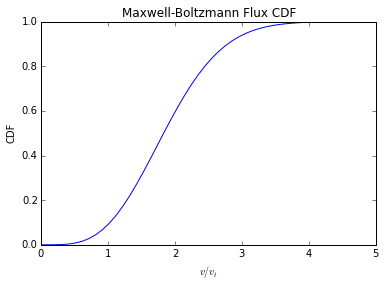

In [2]:
def mbf_cdf(vp):
    return  quad( lambda x: x**3*exp(-x**2/2.), 0, vp)[0]/2.0

vlin = linspace(0,5)

figure()
plot(vlin,map(mbf_cdf,vlin))
xlabel('$v/v_t$')
ylabel('CDF')
title('Maxwell-Boltzmann Flux CDF')
show()

## Inverting the CDF

In simulations, we would prefer to have the CDF tabulated on an equally spaced grid on the y-axis in the above figure, so that if we pick a random number uniformly distributed between 0 and 1, we can quickly obtain a speed that follow the MBF.
\begin{equation}
v(r) = v\ s.t.\ \frac{1}{2}\int\limits_0^v (v^\prime)^3\exp(-\frac{1}{2}(v^\prime)^2)dv^\prime = r
\end{equation}

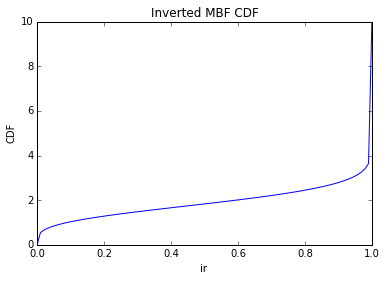

In [3]:
N = 100
ir = linspace(0,1,N+1)
CDF = zeros(N+1)

# Fill in CDF 
#for i in arange(1,N+1):
#    CDF[i] = brentq( lambda x: mbf_cdf(x)-ir[i], 0, 10) 
CDF = [brentq( lambda x: mbf_cdf(x)-r, 0, 10) for r in ir]

figure()
plot(ir,CDF)
xlabel("ir")
ylabel("CDF")
title("Inverted MBF CDF")
show()

Now the above values can be used as a lookup table for velocities in a simulation. Though some refinement near $r=1.0$ should be considered as well.

